<a href="https://colab.research.google.com/github/keirabasma/Formation-IA/blob/main/worksop1_part_1_kadri_ahlem_chahinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
!pip install pandas numpy matplotlib seaborn

In [ ]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08
max,180.289993,183.500000,177.619995,179.979996,179.979996,5.003630e+08


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

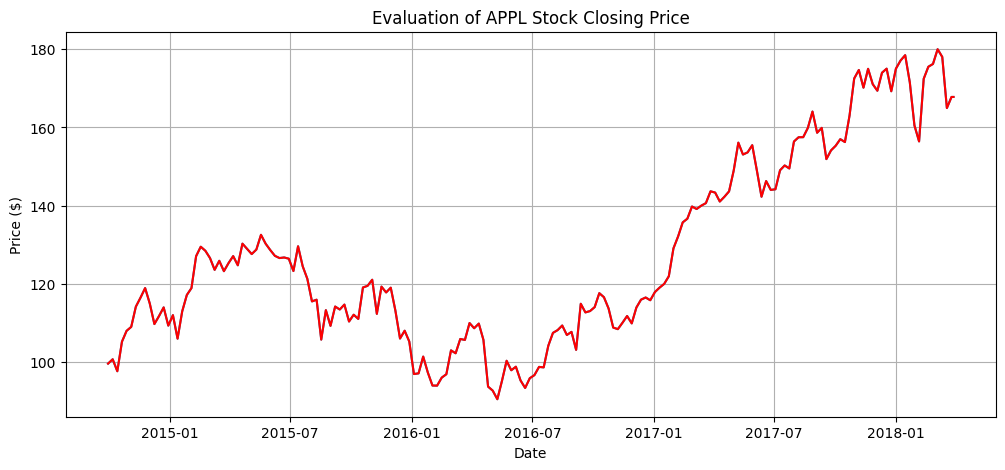

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'])
plt.plot(df.index, df["Close"], color='red')
plt.title("Evaluation of APPL Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid()
plt.show()

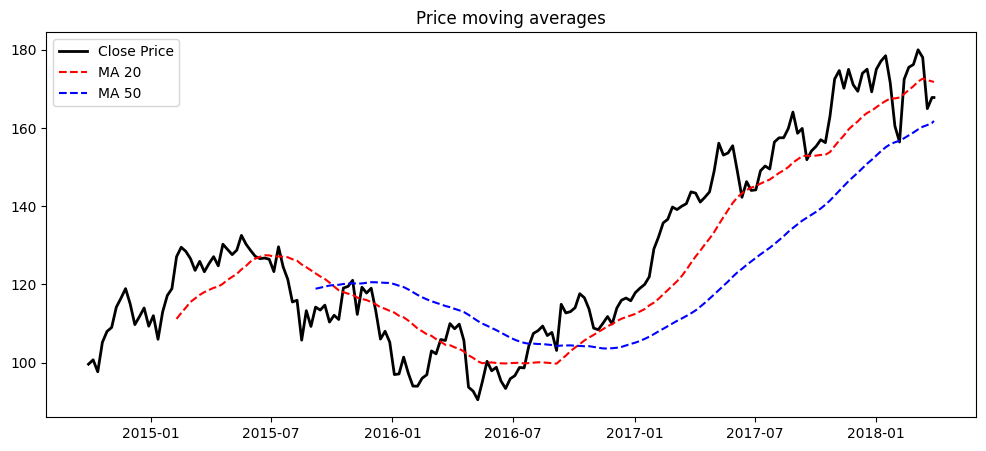

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(df['Close'], label='Close Price', color='black', linewidth=2)
plt.plot(df['MA_20'], label='MA 20', color='red', linewidth=1.5, linestyle='--')
plt.plot(df['MA_50'], label='MA 50', color='blue', linewidth=1.5, linestyle='--')
plt.legend()
plt.title("Price moving averages")
plt.show()

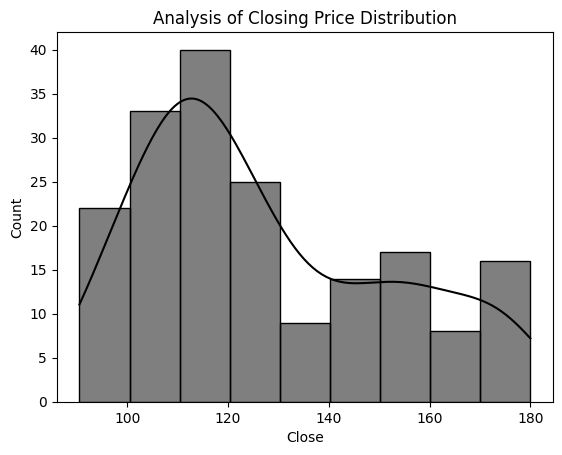

In [ ]:
sns.histplot(df['Close'], kde=True, color='black')
plt.title("Analysis of Closing Price Distribution")
plt.show()


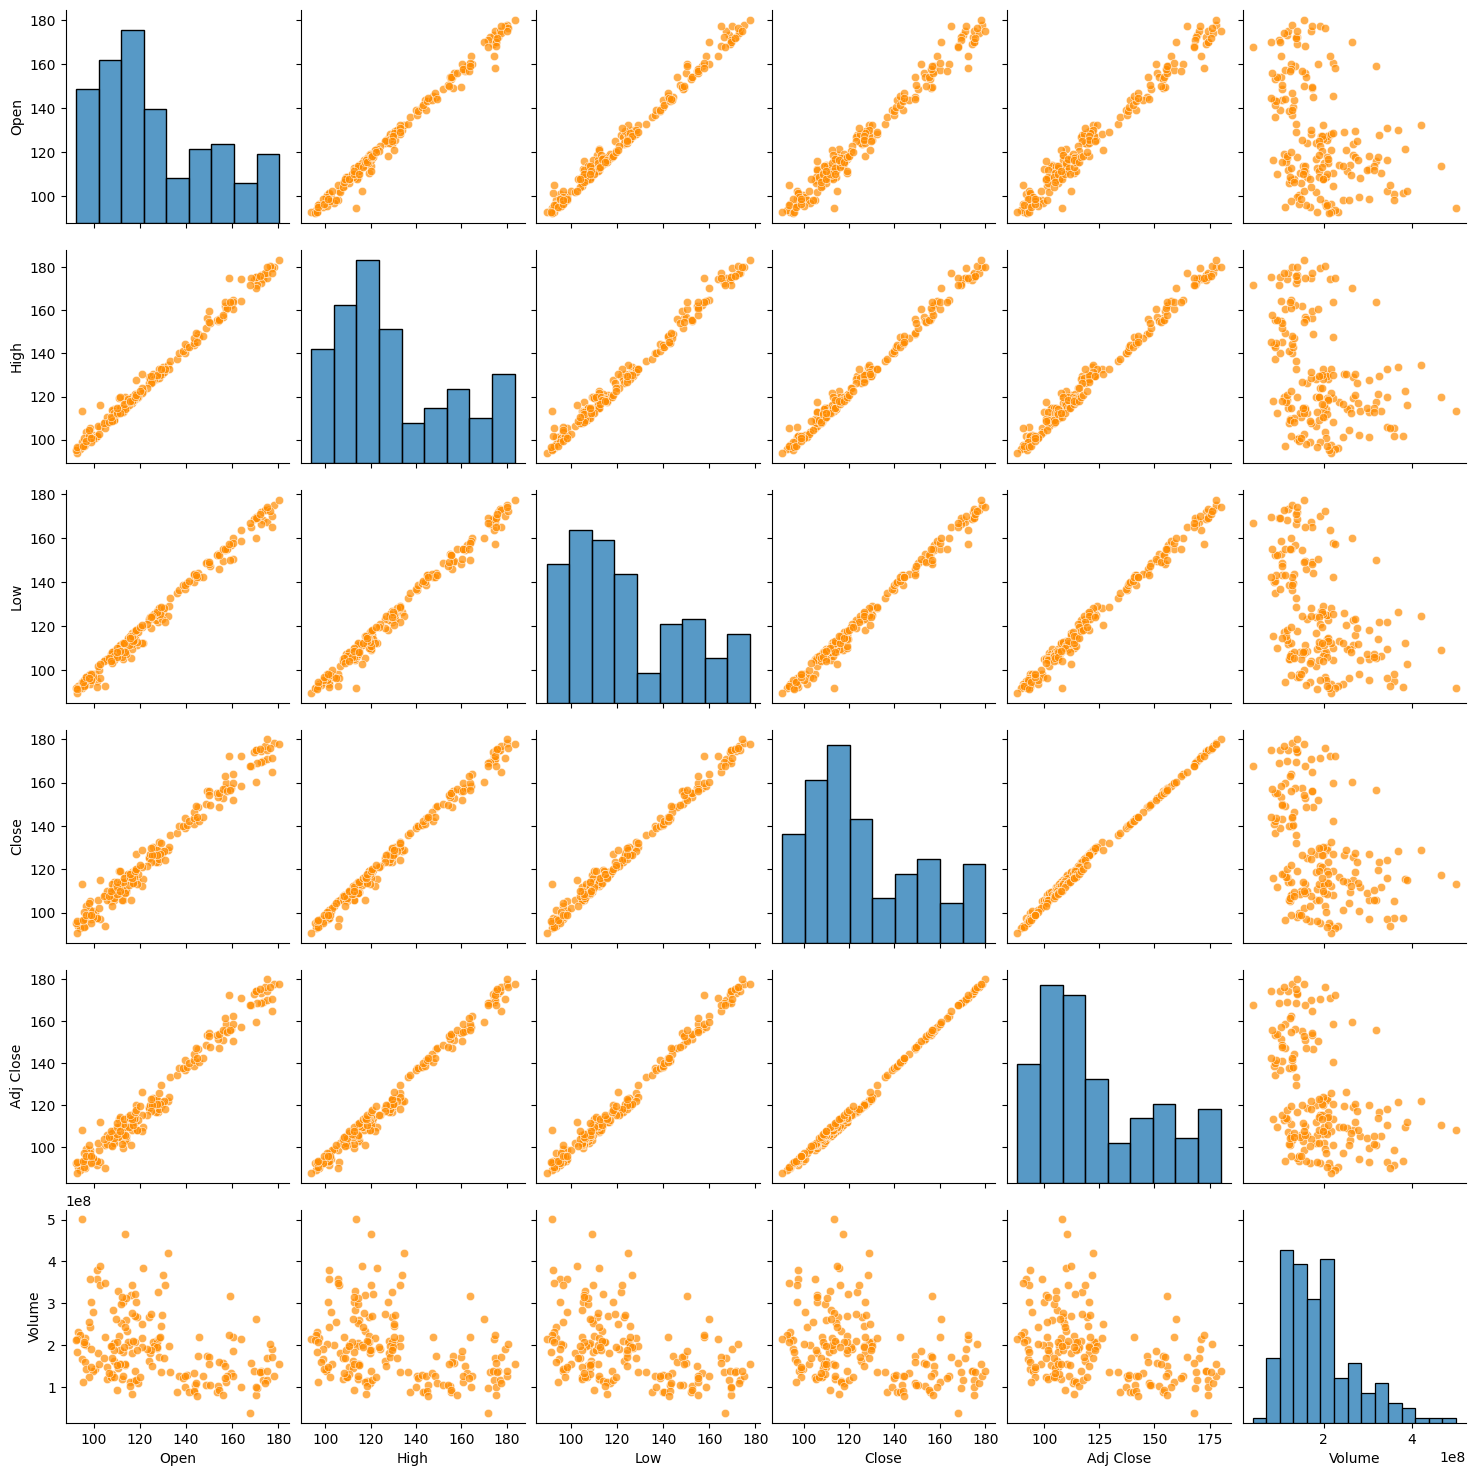

In [ ]:
sns.pairplot(df[["Open","High","Low","Close","Adj Close","Volume"]],
              plot_kws={'color': 'darkorange', 'alpha': 0.7})



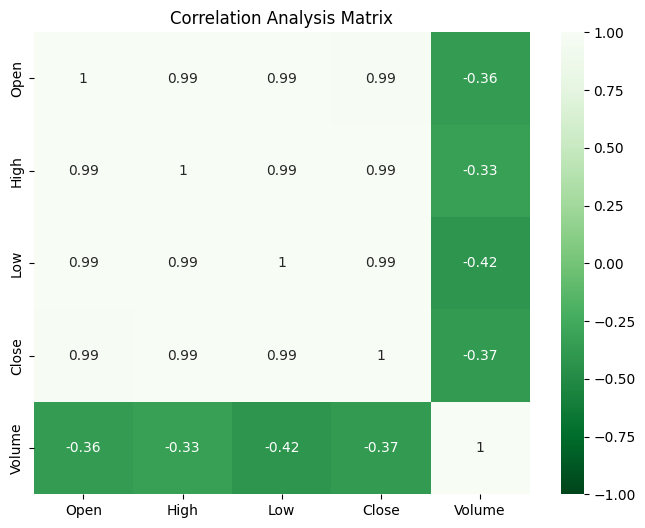

In [ ]:
plt.figure(figsize=(8,6))

sns.heatmap(
    df[['Open','High','Low','Close','Volume']].corr(),
    annot=True,
    cmap='Greens_r',
    vmin=-1, vmax=1
)
plt.title("Correlation Analysis Matrix")
plt.show()

In [ ]:
fig = px.line(df, y="Close", title="Interactive Visualization of APPL Stock Price ",
              color_discrete_sequence=['black'])
fig.show()

In [ ]:
import plotly.express as px

# Scatter plot
fig = px.scatter(df,
                 x='Low',
                 y='High',
                 title='Relationship Between AAPL Low and High Prices',
                 labels={'Low':'Low Price', 'High':'High Price'},
                 hover_data=['Open', 'Close', 'Volume'], color_discrete_sequence=['red'] )

fig.show()

In [ ]:
fig = px.histogram(df, x="Daily_Return", nbins=100,
                   title="Distribution of Daily Returns", color_discrete_sequence=['green'] )
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing=dict(line=dict(color='blue')),
    decreasing=dict(line=dict(color='orange'))
)])

fig.update_layout(
    title="APPL Stock Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price ($)"
)